# Assignment Problem 2

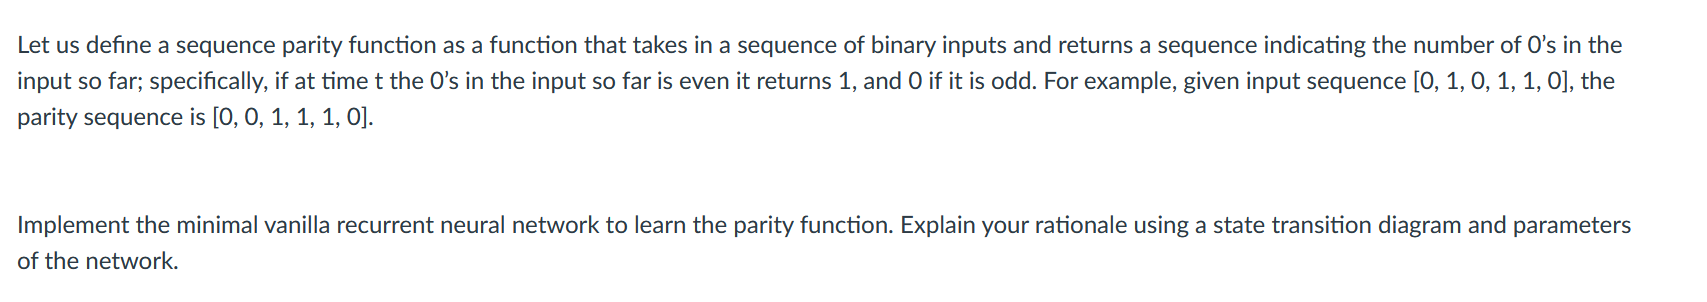

In [1]:
#IMPORTING THE LIBRARIES
import numpy as np
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

### Part 1 : Defining the parity function

In [2]:
#Below fucntion generated the output of parity fucntion given an input
def parity_function(binary_list):
    parity_seq=[]
    for i in range(1,len(binary_list)+1):
        new_arr=binary_list[:i]
        zero_count=new_arr.count(0)
        if zero_count % 2 ==0:
            parity_seq.append(1)
        else:
            parity_seq.append(0)
    return(np.array(parity_seq))

In [3]:
#Giving input sequence as the question.
print(parity_function([0, 1, 0, 1, 1, 0]))

[0 0 1 1 1 0]


### Part 2: Theory & Stratergy

Parity function takes in a sequence of binary inputs, and returns 0 if the number of 0’s is odd, and 1 if it is even. It can be computed sequentially by computing the parity of the initial subsequences.Each parity bit is the NXOR (Not XOR) of the current input with the previous parity bit:

    Input:       0 1 0 1 1 0 1 0 1 1
    Parity bits: 0 1 1 0 1 1 ->

Strategy we used: The output unit y(t) represents the parity bit, and it feeds into the computation at the next time step.

When making the table between y(t) wrt y(t-1) and X(t), We are obtaining NXOR

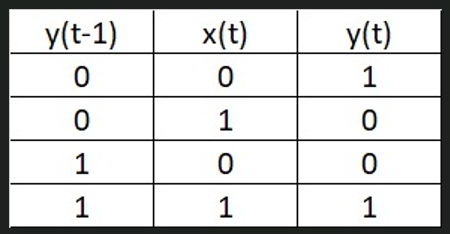

### Part 3: Creating dataset and generating timeseries data

In [4]:
# Creating the train and test dataset
X_train=[]
for i in range(0,20000):
    X_train.append(np.random.choice(a = [0,1]))

X_test=[]
for i in range(0,500):
    X_test.append(np.random.choice(a = [0,1]))
    
Y_train=parity_function(X_train)
Y_test=parity_function(X_test)

In [5]:
# Generating the train and test dataset using timeseriesgenerator function
n_features = 1
n_input = 50
generator = TimeseriesGenerator(X_train, Y_train, length=n_input, batch_size=8)
generator_test = TimeseriesGenerator(X_test, Y_test, length=n_input, batch_size=8)

### Part 4: Model creation and training

In [6]:
model=keras.models.Sequential([
    keras.layers.SimpleRNN(2,return_sequences=True,input_shape=[None,1]),
    keras.layers.Dense(1,activation="sigmoid")
])

In [7]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [8]:
history= model.fit_generator(generator, steps_per_epoch=1, epochs=500,validation_data=generator_test,verbose=1)

C:\Users\amals\AppData\Local\Temp\ipykernel_13168\2943108070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(generator, steps_per_epoch=1, epochs=500,validation_data=generator_test,verbose=1)


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.3055 - accuracy: 0.6250 - val_loss: 0.2666 - val_accuracy: 0.4733
Epoch 2/500
1/1 [==============================] - 0s 146ms/step - loss: 0.2500 - accuracy: 0.3750 - val_loss: 0.2665 - val_accuracy: 0.4733
Epoch 3/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2246 - accuracy: 0.2500 - val_loss: 0.2665 - val_accuracy: 0.4733
Epoch 4/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2492 - accuracy: 0.3750 - val_loss: 0.2665 - val_accuracy: 0.4733
Epoch 5/500
1/1 [==============================] - 0s 145ms/step - loss: 0.2787 - accuracy: 0.6250 - val_loss: 0.2665 - val_accuracy: 0.4733
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.2860 - accuracy: 0.62 - 0s 157ms/step - loss: 0.2860 - accuracy: 0.6250 - val_loss: 0.2664 - val_accuracy: 0.4733
Epoch 7/500
1/1 [==============================] - 0s 157ms/step - loss: 0.2709 - accuracy: 0.5000 - val_loss: 0.26

1/1 [==============================] - 0s 147ms/step - loss: 0.2655 - accuracy: 0.5000 - val_loss: 0.2642 - val_accuracy: 0.4733
Epoch 59/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2375 - accuracy: 0.1250 - val_loss: 0.2641 - val_accuracy: 0.4733
Epoch 60/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2675 - accuracy: 0.6250 - val_loss: 0.2641 - val_accuracy: 0.4733
Epoch 61/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2681 - accuracy: 0.5000 - val_loss: 0.2641 - val_accuracy: 0.4733
Epoch 62/500
1/1 [==============================] - 0s 153ms/step - loss: 0.2808 - accuracy: 0.6250 - val_loss: 0.2640 - val_accuracy: 0.4733
Epoch 63/500
1/1 [==============================] - 0s 157ms/step - loss: 0.2640 - accuracy: 0.5000 - val_loss: 0.2640 - val_accuracy: 0.4733
Epoch 64/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2852 - accuracy: 0.6250 - val_loss: 0.2640 - val_accuracy: 0.4733
Epoch 65/500
1/1 [=

Epoch 116/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2817 - accuracy: 0.6250 - val_loss: 0.2624 - val_accuracy: 0.4733
Epoch 117/500
1/1 [==============================] - 0s 145ms/step - loss: 0.2935 - accuracy: 0.8750 - val_loss: 0.2624 - val_accuracy: 0.4733
Epoch 118/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2658 - accuracy: 0.5000 - val_loss: 0.2624 - val_accuracy: 0.4733
Epoch 119/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2957 - accuracy: 0.7500 - val_loss: 0.2623 - val_accuracy: 0.4733
Epoch 120/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2676 - accuracy: 0.6250 - val_loss: 0.2623 - val_accuracy: 0.4733
Epoch 121/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2771 - accuracy: 0.6250 - val_loss: 0.2623 - val_accuracy: 0.4733
Epoch 122/500
1/1 [==============================] - 0s 157ms/step - loss: 0.2735 - accuracy: 0.6250 - val_loss: 0.2622 - val_accuracy: 0.4733

1/1 [==============================] - 0s 141ms/step - loss: 0.2543 - accuracy: 0.2500 - val_loss: 0.2610 - val_accuracy: 0.4733
Epoch 174/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2677 - accuracy: 0.6250 - val_loss: 0.2609 - val_accuracy: 0.4733
Epoch 175/500
1/1 [==============================] - 0s 125ms/step - loss: 0.2616 - accuracy: 0.3750 - val_loss: 0.2609 - val_accuracy: 0.4733
Epoch 176/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2712 - accuracy: 0.6250 - val_loss: 0.2608 - val_accuracy: 0.4733
Epoch 177/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2773 - accuracy: 0.7500 - val_loss: 0.2608 - val_accuracy: 0.4733
Epoch 178/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2901 - accuracy: 1.0000 - val_loss: 0.2608 - val_accuracy: 0.4733
Epoch 179/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2619 - accuracy: 0.5000 - val_loss: 0.2608 - val_accuracy: 0.4733
Epoch 180/500

1/1 [==============================] - 0s 157ms/step - loss: 0.2638 - accuracy: 0.6250 - val_loss: 0.2605 - val_accuracy: 0.4733
Epoch 231/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2594 - accuracy: 0.5000 - val_loss: 0.2606 - val_accuracy: 0.4733
Epoch 232/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2860 - accuracy: 0.8750 - val_loss: 0.2606 - val_accuracy: 0.4733
Epoch 233/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2596 - accuracy: 0.5000 - val_loss: 0.2606 - val_accuracy: 0.4733
Epoch 234/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2587 - accuracy: 0.5000 - val_loss: 0.2606 - val_accuracy: 0.4733
Epoch 235/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2614 - accuracy: 0.6250 - val_loss: 0.2607 - val_accuracy: 0.4733
Epoch 236/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2586 - accuracy: 0.6250 - val_loss: 0.2607 - val_accuracy: 0.4733
Epoch 237/500

1/1 [==============================] - 0s 141ms/step - loss: 0.2484 - accuracy: 0.3750 - val_loss: 0.2589 - val_accuracy: 0.4733
Epoch 288/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2583 - accuracy: 0.5000 - val_loss: 0.2589 - val_accuracy: 0.4733
Epoch 289/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2482 - accuracy: 0.3750 - val_loss: 0.2588 - val_accuracy: 0.4733
Epoch 290/500
1/1 [==============================] - 0s 188ms/step - loss: 0.2577 - accuracy: 0.3750 - val_loss: 0.2588 - val_accuracy: 0.4733
Epoch 291/500
1/1 [==============================] - 0s 188ms/step - loss: 0.2805 - accuracy: 0.7500 - val_loss: 0.2588 - val_accuracy: 0.4733
Epoch 292/500
1/1 [==============================] - 0s 188ms/step - loss: 0.2570 - accuracy: 0.5000 - val_loss: 0.2587 - val_accuracy: 0.4733
Epoch 293/500
1/1 [==============================] - 0s 173ms/step - loss: 0.2641 - accuracy: 0.3750 - val_loss: 0.2587 - val_accuracy: 0.4733
Epoch 294/500

1/1 [==============================] - 0s 138ms/step - loss: 0.2569 - accuracy: 0.1250 - val_loss: 0.2584 - val_accuracy: 0.4733
Epoch 345/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2569 - accuracy: 0.2500 - val_loss: 0.2584 - val_accuracy: 0.4733
Epoch 346/500
1/1 [==============================] - 0s 151ms/step - loss: 0.2589 - accuracy: 0.5000 - val_loss: 0.2584 - val_accuracy: 0.4733
Epoch 347/500
1/1 [==============================] - 0s 157ms/step - loss: 0.2588 - accuracy: 0.5000 - val_loss: 0.2583 - val_accuracy: 0.4733
Epoch 348/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2612 - accuracy: 0.7500 - val_loss: 0.2583 - val_accuracy: 0.4733
Epoch 349/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2521 - accuracy: 0.3750 - val_loss: 0.2583 - val_accuracy: 0.4733
Epoch 350/500
1/1 [==============================] - 0s 126ms/step - loss: 0.2555 - accuracy: 0.6250 - val_loss: 0.2583 - val_accuracy: 0.4733
Epoch 351/500

1/1 [==============================] - 0s 141ms/step - loss: 0.2567 - accuracy: 0.5000 - val_loss: 0.2574 - val_accuracy: 0.4733
Epoch 402/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2557 - accuracy: 0.5000 - val_loss: 0.2573 - val_accuracy: 0.4733
Epoch 403/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2510 - accuracy: 0.6250 - val_loss: 0.2573 - val_accuracy: 0.4733
Epoch 404/500
1/1 [==============================] - 0s 135ms/step - loss: 0.2607 - accuracy: 0.7500 - val_loss: 0.2573 - val_accuracy: 0.4733
Epoch 405/500
1/1 [==============================] - 0s 157ms/step - loss: 0.2632 - accuracy: 0.2500 - val_loss: 0.2573 - val_accuracy: 0.4733
Epoch 406/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2492 - accuracy: 0.2500 - val_loss: 0.2573 - val_accuracy: 0.4733
Epoch 407/500
1/1 [==============================] - 0s 157ms/step - loss: 0.2555 - accuracy: 0.5000 - val_loss: 0.2572 - val_accuracy: 0.4733
Epoch 408/500

1/1 [==============================] - 0s 141ms/step - loss: 0.2671 - accuracy: 0.7500 - val_loss: 0.2554 - val_accuracy: 0.4733
Epoch 459/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2567 - accuracy: 0.5000 - val_loss: 0.2554 - val_accuracy: 0.4733
Epoch 460/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2560 - accuracy: 0.5000 - val_loss: 0.2554 - val_accuracy: 0.4733
Epoch 461/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2557 - accuracy: 0.5000 - val_loss: 0.2554 - val_accuracy: 0.4733
Epoch 462/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2454 - accuracy: 0.1250 - val_loss: 0.2553 - val_accuracy: 0.4733
Epoch 463/500
1/1 [==============================] - 0s 141ms/step - loss: 0.2889 - accuracy: 0.8750 - val_loss: 0.2553 - val_accuracy: 0.4733
Epoch 464/500
1/1 [==============================] - 0s 138ms/step - loss: 0.2408 - accuracy: 0.2500 - val_loss: 0.2553 - val_accuracy: 0.4733
Epoch 465/500

In [9]:
model1_loss=history.history['loss'][-1]
model1_val_loss=history.history['val_loss'][-1]

### Part 5: Plotting Training and Validation losses.

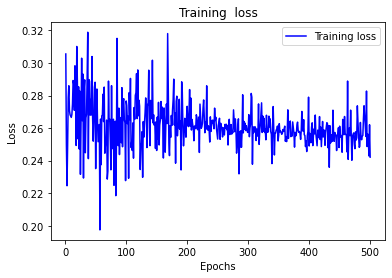

In [10]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
#plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


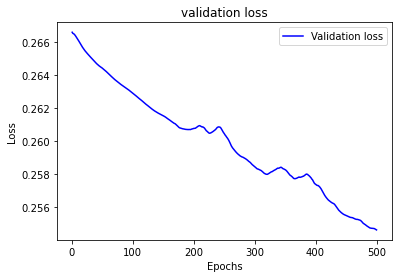

In [11]:
# "bo" is for "blue dot"

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Part 6: prediction

In [12]:
Y_pred=model.predict(generator_test, verbose=1)

57/57 [==============================] - 0s 2ms/step
